# Actividad realizada con IMDB

### Alumnos del Grupo 13:
    - Marquez Brizuela, Rodrigo Andres
    - Dagrava, José Ignacio.

---------------------------------------

In [17]:
#Importamos las librerias de selenium para poder trabajar con ellas durante la actividad
# creamos la variable webdriver de firebox, con la que vamos a recuperar los distintos elementos html de la web amazon prime.
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.by import By
import re
import pandas as pd
import matplotlib.pyplot as plt
import urllib
from IPython.display import display, Markdown
import os 
os.environ["PATH"] = '$PATH:.'
options = webdriver.FirefoxOptions()
driver = webdriver.Firefox()

Ingresamos a la web y seleccionamos la categoría Top 250 de películas.

In [18]:
# Obtenemos la web por primera vez
driver.get("https://www.imdb.com/?ref_=nv_home")
#Voy a la web de mejores películas
driver.find_element(By.CSS_SELECTOR, "#imdbHeader-navDrawerOpen--desktop > div:nth-child(2)").click()
driver.implicitly_wait(10)
categoria = driver.find_element(By.XPATH, "/html/body/div[2]/nav/div[2]/aside/div/div[2]/div/div[1]/span/div/div/ul/a[3]").get_attribute('href')
driver.get(categoria)

## Obtención URLs films

In [19]:
# Generamos lista de urls de las primeras 4 películas
urls =[]

numfilms = 4 #Numero de films que se desea obtener

for i in range(1,numfilms+1):
    #Por cada pelicula recuperamos la url con el detalle de la misma y su titulo.
    selector = f".lister-list > tr:nth-child({i}) > td:nth-child(2) > a:nth-child(1)"
    url = driver.find_element(By.CSS_SELECTOR, selector).get_attribute('href')
    title = driver.find_element(By.CSS_SELECTOR, selector).get_attribute('text')
    urls.append({"Url": url, "Name": title})

## Obtención detalle films 

In [20]:
# Recorremos la lista de urls para obtener el detalle de cada pelicula y luego guardamos todas las variables en un DataFrame
for i in urls:
    driver.get(i["Url"])
    driver.implicitly_wait(10)
    
    # Rating
    i["Rating"] = driver.find_element(By.CSS_SELECTOR, ".sc-94726ce4-4 > div:nth-child(1) > div:nth-child(1) > a:nth-child(2) > div:nth-child(1) > div:nth-child(1) > div:nth-child(2) > div:nth-child(1) > span:nth-child(1)").text
    
    #Duracion
    i["duracion"]= driver.find_element_by_xpath("/html/body/div[2]/main/div/section[1]/section/div[3]/section/section/div[1]/div[1]/div/ul/li[3]").text
    
    #Año
    i["anio"] = driver.find_element(By.CSS_SELECTOR,".sc-52284603-0 > li:nth-child(1) > a:nth-child(1)").get_attribute('text')

    # DEscripción
    i["descripcion"] = driver.find_element(By.CSS_SELECTOR,".sc-14389611-2").text
    
    #Director
    i["director"] = driver.find_element(By.CSS_SELECTOR, ".sc-fa02f843-0 > ul:nth-child(1) > li:nth-child(1) > div:nth-child(2) > ul:nth-child(1) > li:nth-child(1) > a:nth-child(1)").get_attribute('text')
    
    #Guíon
    i["guion"] = driver.find_element(By.CSS_SELECTOR, "ul.ipc-metadata-list:nth-child(3) > li:nth-child(2) > div:nth-child(2) > ul:nth-child(1) > li:nth-child(1) > a:nth-child(1)").get_attribute('text')
    
    #Reparto
    reparto=""
    for a in range(18):
        reparto= reparto+", "+driver.find_element(By.CSS_SELECTOR, f"div.sc-11eed019-7:nth-child({a+1}) > div:nth-child(2) > a:nth-child(1)").text
    i["reparto_ppal"] = reparto[1:]
    
    #Generos
    i["generos"] = driver.find_element(By.CSS_SELECTOR, "ul.ipc-metadata-list:nth-child(4) > li:nth-child(2) > div:nth-child(2) > ul:nth-child(1)").text
    i["generos"] = re.sub(r'(?<=[a-z])(?=[A-Z])', ', ', i["generos"])
    
    #Peliculas relacionadas
    similares=""
    for b in range(12):
        similares = similares+", "+driver.find_element(By.CSS_SELECTOR, f"div.ipc-poster-card--base:nth-child({b+1}) > a:nth-child(3) > span:nth-child(1)").text
    i["similares"] = similares
    
    #Capturamos el url de una imagen de la pelicula.
    web_imagenes = driver.find_element(By.CSS_SELECTOR, ".sc-cd14acea-0").get_attribute('href')
    driver.get(web_imagenes)
    i["imagen"] = driver.find_element(By.CSS_SELECTOR, "#media_index_thumbnail_grid > a:nth-child(1) > img:nth-child(1)").get_attribute("src")
    
    print("Se capturaron con exito los datos de la pelicula", i["Name"])

<ipython-input-20-d4b17fec26e0>:10: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  i["duracion"]= driver.find_element_by_xpath("/html/body/div[2]/main/div/section[1]/section/div[3]/section/section/div[1]/div[1]/div/ul/li[3]").text


Se capturaron con exito los datos de la pelicula Cadena perpetua
Se capturaron con exito los datos de la pelicula El padrino
Se capturaron con exito los datos de la pelicula El caballero oscuro
Se capturaron con exito los datos de la pelicula El padrino: Parte II


## Films

In [21]:
# Pasamos a DataFrame la lista y observamos que se haya capturado todo bien.
movies = pd.DataFrame(urls)
movies.drop(labels= ["Url"], axis=1, inplace= True)
movies.head()

,Name,Rating,duracion,anio,descripcion,director,guion,reparto_ppal,generos,similares,imagen
0,Cadena perpetua,"9,3",2h 22min,1994,Andy Dufresne es encarcelado por matar a su es...,Frank Darabont,Stephen King,"Tim Robbins, Morgan Freeman, Bob Gunton, Will...",Drama,", El padrino, Forrest Gump, El caballero oscur...",https://m.media-amazon.com/images/M/MV5BMTM0Nj...
1,El padrino,"9,2",2h 55min,1972,El envejecido patriarca de una dinastía del cr...,Francis Ford Coppola,Mario Puzo,"Marlon Brando, Al Pacino, James Caan, Diane K...","Crimen, Drama",", El padrino: Parte II, Cadena perpetua, Pulp ...",https://m.media-amazon.com/images/M/MV5BZTFiOD...
2,El caballero oscuro,"9,1",2h 32min,2008,Cuando la amenaza conocida como el Joker causa...,Christopher Nolan,Jonathan Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, ...","Acción, Crimen, Drama, Suspense",", El caballero oscuro: La leyenda renace, Batm...",https://m.media-amazon.com/images/M/MV5BOTAxNz...
3,El padrino: Parte II,"9,0",3h 22min,1974,Se retratan los inicios de la vida y la carrer...,Francis Ford Coppola,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dia...","Crimen, Drama",", El padrino, El padrino: Parte III, Pulp Fict...",https://m.media-amazon.com/images/M/MV5BNDYwMj...


### Fichero

In [22]:
#Guardamos en un fichero las peliculas obtenidas.
movies.to_csv("films.csv",sep=";")

#Liberamos el driver ya que no se lo necesita más.
driver.quit()

#### Presentación del contenido de cada item recodigo de la web:

### Película Cadena perpetua

Rating:  9,3
Duracion:  2h 22min
Año:  1994
Descripción:  Andy Dufresne es encarcelado por matar a su esposa y al amante de esta. Tras una dura adaptación, intenta mejorar las condiciones de la prisión y dar esperanza a sus compañeros.
Director:  Frank Darabont
Guion:  Stephen King
Reparto:   Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler, Clancy Brown, Gil Bellows, Mark Rolston, James Whitmore, Jeffrey DeMunn, Larry Brandenburg, Neil Giuntoli, Brian Libby, David Proval, Joseph Ragno, Jude Ciccolella, Paul McCrane, Renee Blaine, Scott Mann
Generos:  Drama
Similares:  , El padrino, Forrest Gump, El caballero oscuro, Origen, El club de la lucha, Pulp Fiction, Interstellar, El padrino: Parte II, La milla verde, La lista de Schindler, Seven, Joker


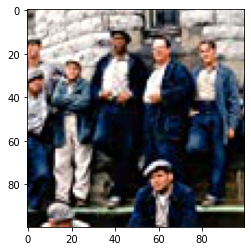

In [23]:
display(Markdown("### Película "+ urls[0]["Name"]))
print("Rating: ",urls[0]["Rating"])
print("Duracion: ",urls[0]["duracion"])
print("Año: ",urls[0]["anio"])
print("Descripción: ",urls[0]["descripcion"])
print("Director: ",urls[0]["director"])
print("Guion: ",urls[0]["guion"])
print("Reparto: ",urls[0]["reparto_ppal"])
print("Generos: ",urls[0]["generos"])
print("Similares: ",urls[0]["similares"])

f = open('scraped_image','wb')
f.write(urllib.request.urlopen(urls[0]["imagen"]).read())
f.close()

im=plt.imread('scraped_image')
plt.imshow(im)

### Película El padrino

Rating:  9,2
Duracion:  2h 55min
Año:  1972
Descripción:  El envejecido patriarca de una dinastía del crimen organizado en la ciudad de Nueva York de la posguerra transfiere el control de su imperio clandestino a su reacio hijo menor.
Director:  Francis Ford Coppola
Guion:  Mario Puzo
Reparto:   Marlon Brando, Al Pacino, James Caan, Diane Keaton, Richard S. Castellano, Robert Duvall, Sterling Hayden, John Marley, Richard Conte, Al Lettieri, Abe Vigoda, Talia Shire, Gianni Russo, John Cazale, Rudy Bond, Al Martino, Morgana King, Lenny Montana
Generos:  Crimen, Drama
Similares:  , El padrino: Parte II, Cadena perpetua, Pulp Fiction, El padrino: Parte III, Forrest Gump, El club de la lucha, El caballero oscuro, Origen, La lista de Schindler, Uno de los nuestros, El señor de los anillos: El retorno del rey, 12 hombres sin piedad


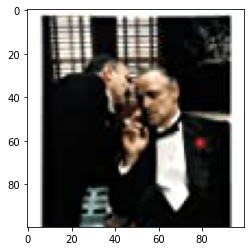

In [24]:
display(Markdown("### Película "+ urls[1]["Name"]))
print("Rating: ",urls[1]["Rating"])
print("Duracion: ",urls[1]["duracion"])
print("Año: ",urls[1]["anio"])
print("Descripción: ",urls[1]["descripcion"])
print("Director: ",urls[1]["director"])
print("Guion: ",urls[1]["guion"])
print("Reparto: ",urls[1]["reparto_ppal"])
print("Generos: ",urls[1]["generos"])
print("Similares: ",urls[1]["similares"])

f = open('scraped_image','wb')
f.write(urllib.request.urlopen(urls[1]["imagen"]).read())
f.close()

im=plt.imread('scraped_image')
plt.imshow(im)

### Película El caballero oscuro

Rating:  9,1
Duracion:  2h 32min
Año:  1972
Descripción:  El envejecido patriarca de una dinastía del crimen organizado en la ciudad de Nueva York de la posguerra transfiere el control de su imperio clandestino a su reacio hijo menor.
Director:  Christopher Nolan
Guion:  Jonathan Nolan
Reparto:   Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine, Maggie Gyllenhaal, Gary Oldman, Morgan Freeman, Monique Gabriela Curnen, Ron Dean, Cillian Murphy, Chin Han, Nestor Carbonell, Eric Roberts, Ritchie Coster, Anthony Michael Hall, Keith Szarabajka, Colin McFarlane, Joshua Harto
Generos:  Acción, Crimen, Drama, Suspense
Similares:  , El caballero oscuro: La leyenda renace, Batman Begins, Joker, Cadena perpetua, Origen, Interstellar, El padrino, Forrest Gump, El club de la lucha, Vengadores: Endgame, Vengadores: Infinity War, El señor de los anillos: El retorno del rey


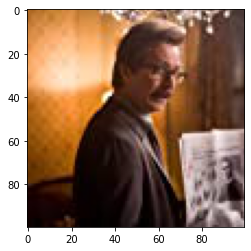

In [25]:
display(Markdown("### Película "+ urls[2]["Name"]))
print("Rating: ",urls[2]["Rating"])
print("Duracion: ",urls[2]["duracion"])
print("Año: ",urls[1]["anio"])
print("Descripción: ",urls[1]["descripcion"])
print("Director: ",urls[2]["director"])
print("Guion: ",urls[2]["guion"])
print("Reparto: ",urls[2]["reparto_ppal"])
print("Generos: ",urls[2]["generos"])
print("Similares: ",urls[2]["similares"])

f = open('scraped_image','wb')
f.write(urllib.request.urlopen(urls[2]["imagen"]).read())
f.close()

im=plt.imread('scraped_image')
plt.imshow(im)

### Película El padrino: Parte II

Rating:  9,0
Duracion:  3h 22min
Año:  1974
Descripción:  Se retratan los inicios de la vida y la carrera de Vito Corleone en el Nueva York de los años 20, mientras su hijo, Michael, amplía y refuerza su control sobre el sindicato del crimen familiar.
Director:  Francis Ford Coppola
Guion:  Francis Ford Coppola
Reparto:   Al Pacino, Robert De Niro, Robert Duvall, Diane Keaton, John Cazale, Talia Shire, Lee Strasberg, Michael V. Gazzo, G.D. Spradlin, Richard Bright, Gastone Moschin, Tom Rosqui, Bruno Kirby, Frank Sivero, Francesca De Sapio, Morgana King, Marianna Hill, Leopoldo Trieste
Generos:  Crimen, Drama
Similares:  , El padrino, El padrino: Parte III, Pulp Fiction, La lista de Schindler, Uno de los nuestros, Cadena perpetua, El señor de los anillos: El retorno del rey, Forrest Gump, El club de la lucha, 12 hombres sin piedad, El señor de los anillos: Las dos torres, El señor de los anillos: La comunidad del anillo


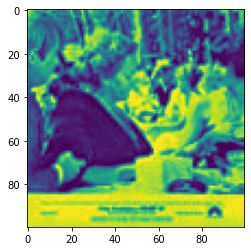

In [26]:
display(Markdown("### Película "+ urls[3]["Name"]))
print("Rating: ",urls[3]["Rating"])
print("Duracion: ",urls[3]["duracion"])
print("Año: ",urls[3]["anio"])
print("Descripción: ",urls[3]["descripcion"])
print("Director: ",urls[3]["director"])
print("Guion: ",urls[3]["guion"])
print("Reparto: ",urls[3]["reparto_ppal"])
print("Generos: ",urls[3]["generos"])
print("Similares: ",urls[3]["similares"])

f = open('scraped_image','wb')
f.write(urllib.request.urlopen(urls[3]["imagen"]).read())
f.close()

im=plt.imread('scraped_image')
plt.imshow(im)